## Kickstarter


In [163]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

ks = pd.read_csv('ks-projects-201801.csv',
                 parse_dates=['deadline', 'launched'])

In [166]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 43.3+ MB


In [167]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [159]:
ks.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [160]:
ks_by_category = ks.groupby("category", as_index=False)["backers"].sum()
ks_by_category = ks_by_category.sort_values("backers", ascending=True).reset_index(drop=True)
ks_by_category = ks_by_category.tail(10)
ks_by_category

,category,backers
149,Design,755421
150,Food,766977
151,Music,865918
152,Gadgets,930880
153,Hardware,1136323
154,Technology,1155297
155,Documentary,1447677
156,Video Games,4419505
157,Tabletop Games,6049205
158,Product Design,6178913


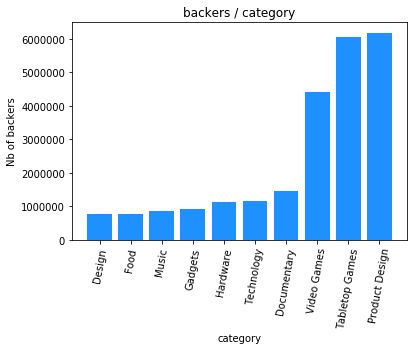

In [161]:
plt.bar(ks_by_category.category, ks_by_category.backers, color="dodgerblue")
plt.xlabel('category')
plt.xticks(rotation=80)
plt.ylabel('Nb of backers')
plt.title('backers / category')
plt.show()

In [162]:
# Drop live projects
ks = ks.query('state != "live"')

In [10]:
# Add outcome column, "successful" == 1, others are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))
ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,outcome
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,0


In [12]:
# Timestamp features
ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)

# Label encoding
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)

data_cols = ['goal', 'hour', 'day', 'month', 'year', 'outcome']
baseline_data = ks[data_cols].join(encoded)

baseline_data

,goal,hour,day,month,year,outcome,category,currency,country
0,1000.0,12,11,8,2015,0,108,5,9
1,30000.0,4,2,9,2017,0,93,13,22
2,45000.0,0,12,1,2013,0,93,13,22
3,5000.0,3,17,3,2012,0,90,13,22
4,19500.0,8,4,7,2015,0,55,13,22
...,...,...,...,...,...,...,...,...,...
378656,50000.0,2,17,9,2014,0,39,13,22
378657,1500.0,3,22,6,2011,0,93,13,22
378658,15000.0,19,1,7,2010,0,93,13,22
378659,15000.0,18,13,1,2016,0,138,13,22


In [17]:
# Defining  functions that will help us test our encodings
import lightgbm as lgb
from sklearn import metrics

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

def train_model(train, valid):
    feature_cols = train.columns.drop('outcome')

    dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    print("Training model!")
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['outcome'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}")
    return bst

In [18]:
# Training a model on the baseline data
train, valid, _ = get_data_splits(baseline_data)
bst = train_model(train, valid)

Training model!
Validation AUC score: 0.7467


### #1 Count Encoding
- add 3 columns with a count
-  Rare values tend to have similar counts (with values like 1 or 2), so you can classify rare values together at prediction time. Common values with large counts are unlikely to have the same exact count as other values. So, the common/important values get their own grouping.
- slight increase but not enough

In [14]:
import category_encoders as ce
cat_features = ['category', 'currency', 'country']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(ks[cat_features])

data = baseline_data.join(count_encoded.add_suffix("_count"))
data

,goal,hour,day,month,year,outcome,category,currency,country,category_count,currency_count,country_count
0,1000.0,12,11,8,2015,0,108,5,9,1362,33853,33393
1,30000.0,4,2,9,2017,0,93,13,22,5174,293624,290887
2,45000.0,0,12,1,2013,0,93,13,22,5174,293624,290887
3,5000.0,3,17,3,2012,0,90,13,22,15647,293624,290887
4,19500.0,8,4,7,2015,0,55,13,22,10054,293624,290887
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,50000.0,2,17,9,2014,0,39,13,22,16082,293624,290887
378657,1500.0,3,22,6,2011,0,93,13,22,5174,293624,290887
378658,15000.0,19,1,7,2010,0,93,13,22,5174,293624,290887
378659,15000.0,18,13,1,2016,0,138,13,22,6850,293624,290887


In [19]:
# Training a model on the baseline data
train, valid, test = get_data_splits(data)
bst = train_model(train, valid)

Training model!
Validation AUC score: 0.7486


### #2Target Encoding
- encode after train and validation set

In [10]:
import category_encoders as ce
cat_features = ['category', 'currency', 'country']

# Create the encoder itself
target_enc = ce.TargetEncoder(cols=cat_features)

train, valid, _ = get_data_splits(data)

# Fit the encoder using the categorical features and target
target_enc.fit(train[cat_features], train['outcome'])

# Transform the features, rename the columns with _target suffix, and join to dataframe
train = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

train.head()
bst = train_model(train, valid)

Training model!
Validation AUC score: 0.7491


### #3CatBoost Encoding
- similar to target encoding in that it's based on the target probablity for a given value. However with CatBoost, for each row, the target probability is calculated only from the rows before i

In [11]:
cat_features = ['category', 'currency', 'country']
target_enc = ce.CatBoostEncoder(cols=cat_features)

train, valid, _ = get_data_splits(data)
target_enc.fit(train[cat_features], train['outcome'])

train = train.join(target_enc.transform(train[cat_features]).add_suffix('_cb'))
valid = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_cb'))

bst = train_model(train, valid)

Training model!
Validation AUC score: 0.7492
